# Task5 食物声音识别之模型改进与优化

# 01 过拟合和欠拟合

​		在模型评估与调整的过程中，往往会遇到“过拟合”或“欠拟合”的情况。如何有效地识别“过拟合”和“欠拟合”现象，并有针对性地进行模型调整，是不断改进算法模型的关键。采用多种方法、从多个角度降低“过拟合”和“欠拟合”的风险是模型优化需要考虑的。

## 1.1 过拟合和欠拟合

​		过拟合是指模型对于训练数据拟合呈过当的情况，反映到评估指标上，就是模型在训练集上的表现很好，但在测试集和新数据上的表现较差。欠拟合指的是模型在训练和预测时表现都不好的情况。

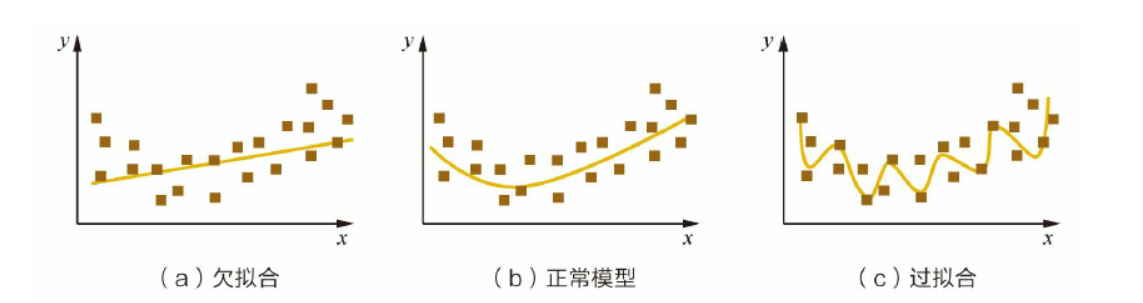

可以看出，图（a）是欠拟合的情况，拟合的黄线没有很好地捕捉到数据的特征，不能够很好地拟合数据。图（c）则是过拟合的情况，模型过于复杂，把噪声数据的特征也学习到模型中，导致模型泛化能力下降，在后期应用过程中很容易输出错误的预测结果。

## 1.2 降低**过拟合**风险的方法

​	（1）从数据入手，获得更多的训练数据。使用更多的训练数据是解决过拟合问题最有效的手段，因为更多的样本能够让模型学习到更多更有效的特征，减小噪声的影响。当然，直接增加实验数据一般是很困难的，但是可以通过一定的规则来扩充训练数据。比如，在图像分类的问题上，可以通过图像的平移、旋转、缩放等方式扩充数据；更进一步地，可以使用生成式对抗网络来合成大量的新训练数据。**思考：在音频数据上应该怎么办呢？？？**

​	（2）降低模型复杂度。在数据较少时，模型过于复杂是产生过拟合的主要因素，适当降低模型复杂度可以避免模型拟合过多的采样噪声。例如，在神经网络模型中减少网络层数、神经元个数等；在决策树模型中降低树的深度、进行剪枝等。

​	（3）正则化方法。给模型的参数加上一定的正则约束，比如将权值的大小加入到损失函数中。以L2正则化为例：在优化原来的目标函数C0的同时，也能避免权值过大带来的过拟合风险。

​	（4）集成学习方法。集成学习是把多个模型集成在一起，来降低单一模型的过拟合风险，如Bagging方法。

## 1.3 降低**欠拟合**风险的方法

​	（1）添加新特征。当特征不足或者现有特征与样本标签的相关性不强时，模型容易出现欠拟合。通过挖掘“上下文特征”“ID类特征”“组合特征”等新的特征，往往能够取得更好的效果。在深度学习潮流中，有很多模型可以帮助完成特征工程，如因子分解机、梯度提升决策树、Deep-crossing等都可以成为丰富特征的方法。
​	（2）增加模型复杂度。简单模型的学习能力较差，通过增加模型的复杂度可以使模型拥有更强的拟合能力。例如，在线性模型中添加高次项，在神经网络模型中增加网络层数或神经元个数等。
​	（3）减小正则化系数。正则化是用来防止过拟合的，但当模型出现欠拟合现象时，则需要有针对性地减小正则化系数。



# 02 泛化误差、偏差和方差


模型调优，第一步是要找准目标：我们要做什么？一般来说，这个目标是提升某个模型评估指标，比如对于随机森林来说，我们想要提升的是模型在未知数据上的准确率（由score或oob_score_来衡量）。找准了这个目标，我们就需要思考：模型在未知数据上的准确率受什么因素影响？常用来衡量模型在未知数据上的准确率的指标，叫做泛化误差（Genelization error）。

## 2.1 泛化误差

​		当模型在未知数据（测试集或者袋外数据）上表现糟糕时，我们说模型的泛化程度不够，泛化误差大，模型的效果不好。泛化误差受到模型的结构（复杂度）影响。

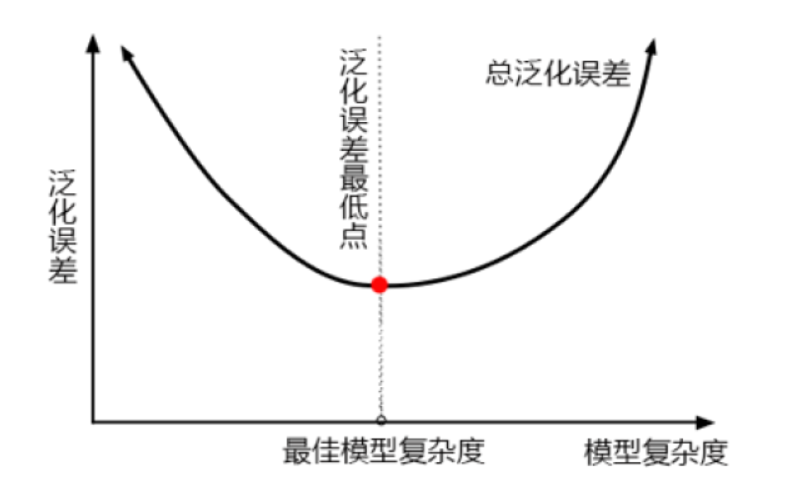

​		上面这张图，它准确地描绘了泛化误差与模型复杂度的关系，当模型太复杂，模型就会过拟合，泛化能力就不够，所以泛化误差大。当模型太简单，模型就会欠拟合，拟合能力就不够，所以误差也会大。只有当模型的复杂度刚刚好的才能够达到泛化误差最小的目标。那模型的复杂度与我们的参数有什么关系呢？对树模型来说，树越茂盛，深度越深，枝叶越多，模型就越复杂。所以树模型是天生位于图的右上角的模型，随机森林是以树模型为基础，所以随机森林也是天生复杂度高的模型。随机森林的参数，都是向着一个目标去：减少模型的复杂度，把模型往图像的左边移动，防止过拟合。

​		当然了，调优没有绝对，也有天生处于图像左边的随机森林，所以调参之前，我们要先判断，模型现在究竟处于图像的哪一边。泛化误差的背后其实是“偏差-方差困境”，原理十分复杂。

有四点需要注意的：
1）模型太复杂或者太简单，都会让泛化误差高，我们追求的是位于中间的平衡点
2）模型太复杂就会过拟合，模型太简单就会欠拟合
3）对树模型和树的集成模型来说，树的深度越深，枝叶越多，模型越复杂
4）树模型和树的集成模型的目标，都是减少模型复杂度，把模型往图像的左边移动

## 2.2 偏差和方差

​		用过拟合、欠拟合来定性地描述模型是否很好地解决了特定的问题。从定量的角度来说，可以用模型的偏差（Bias）与方差（Variance）来描述模型的性能。

​		在有监督学习中，模型的泛化误差来源于两个方面——偏差和方差，具体来讲偏差和方差的定义如下：偏差指的是由所有采样得到的大小为m的训练数据集训练出的所有模型的输出的平均值和真实模型输出之间的偏差。偏差通常是由于我们对学习算法做了错误的假设所导致的，比如真实模型是某个二次函数，但我们假设模型是一次函数。由偏差带来的误差通常在训练误差上就能体现出来。方差指的是由所有采样得到的大小为m的训练数据集训练出的所有模型的输出的方差。方差通常是由于模型的复杂度相对于训练样本数m过高导致的，比如一共有100个训练样本，而我们假设模型是阶数不大于200的多项式函数。由方差带来的误差通常体现在测试误差相对于训练误差的增量上。

​		上面的定义很准确，但不够直观，为了更清晰的理解偏差和方差，可以用一个射击的例子来进一步描述这二者的区别和联系。假设一次射击就是一个机器学习模型对一个样本进行预测。射中靶心位置代表预测准确，偏离靶心越远代表预测误差越大。 我们通过n次采样得到n个大小为m的训练样本集合，训练出n个模型，对同一个样本做预测，相当于我们做了n次射击，射击结果如下图所示。我们最期望的结果就是左上角的结果，射击结果又准确又集中，说明模型的偏差和方差都很小；右上图虽然射击结果的中心在靶心周围，但分布比较分散，说明模型的偏差较小但方差较大；同理，左下图说明模型方差较小，偏差较大；右下图说明模型方差较大，偏差也较大。

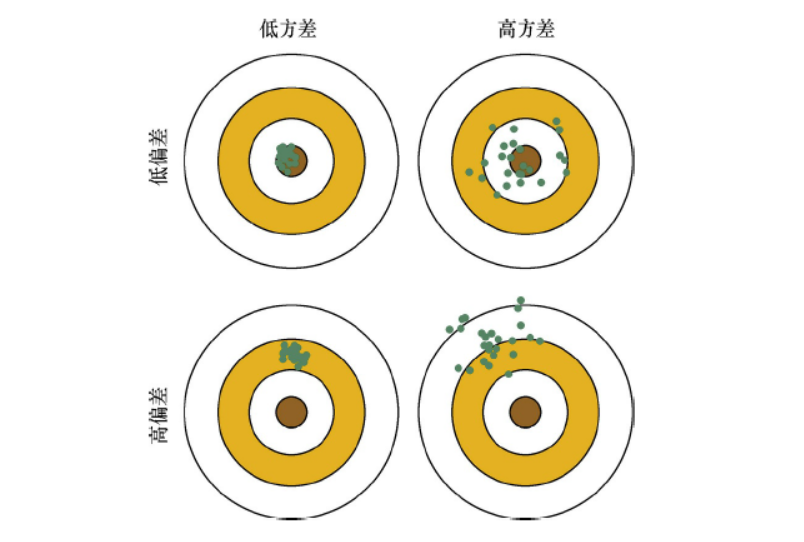


# 03 模型评估

​		在机器学习中，我们通常把样本分为训练集和测试集，训练集用于训练模型，测试集用于评估模型。在样本划分和模型验证的过程中，存在着不同的抽样方法和验证方法。我们应当熟知这些方法及其优缺点、以便能够在不同问题中挑选合适的评估方法。

## 3.1 Holdout检验

​		Holdout 检验是最简单也是最直接的验证方法，它将原始的样本集合随机划分成训练集和验证集两部分。比方说，对于一个预测模型，我们把样本按照70%～30% 的比例分成两部分，70% 的样本用于模型训练；30% 的样本用于模型验证，包括绘制ROC曲线、计算精确率和召回率等指标来评估模型性能。

​		Holdout 检验的缺点很明显，即在验证集上计算出来的最后评估指标与原始分组有很大关系。为了消除随机性，引入了“交叉检验”的思想。

## 3.2 交叉检验

​		**k-fold交叉验证**：首先将全部样本划分成k个大小相等的样本子集；依次遍历这k个子集，每次把当前子集作为验证集，其余所有子集作为训练集，进行模型的训练和评估；最后把k次评估指标的平均值作为最终的评估指标。在实际实验中，k经常取10。 

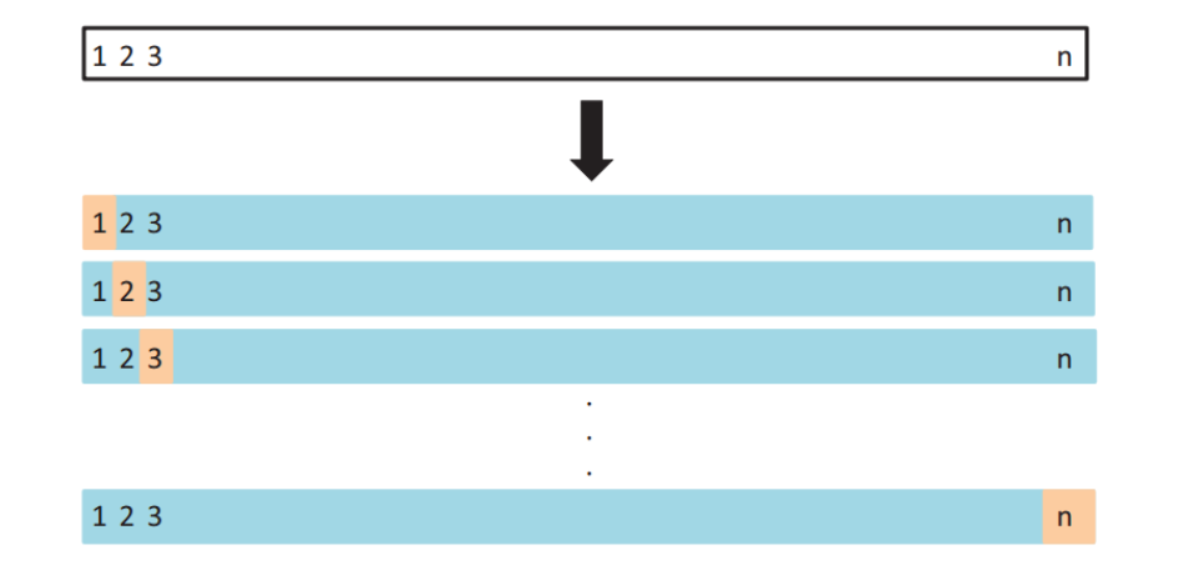

​                                                                                               交叉验证图


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Single Tree:0.9074074074074074 Random Forest:1.0


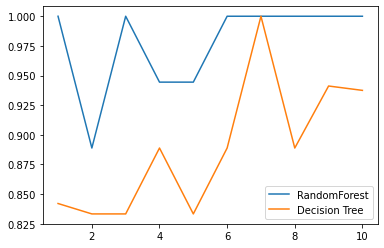

In [3]:
# 使用红酒数据集，验证10折交叉验证在随机森林和单个决策树效益的对比。
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

wine = load_wine()

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)
print("Single Tree:{}".format(score_c)
,"Random Forest:{}".format(score_r)
)

#交叉验证：是数据集划分为n分，依次取每一份做测试集，每n-1份做训练集，多次训练模型以观测模型稳定性的方法
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)
clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)
plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()


​		**留一验证**：每次留下1个样本作为验证集，其余所有样本作为测试集。样本总数为n，依次对n个样本进行遍历，进行n次验证，再将评估指标求平均值得到最终的评估指标。在样本总数较多的情况下，留一验证法的时间开销极大。事实上，留一验证是留p验证的特例。留p验证是每次留下p个样本作为验证集，而从n个元素中选择p个元素有$C_{n}^{p}$种可能，因此它的时间开销更是远远高于留一验证，故而很少在实际工程中被应用。

## 3.3 自助法

​		不管是Holdout检验还是交叉检验，都是基于划分训练集和测试集的方法进行模型评估的。然而，当样本规模比较小时，将样本集进行划分会让训练集进一步减小，这可能会影响模型训练效果。有没有能维持训练集样本规模的验证方法呢？自助法可以比较好地解决这个问题。
​		自助法是基于自助采样法的检验方法。对于总数为n的样本集合，进行n次有放回的随机抽样，得到大小为n的训练集。n次采样过程中，有的样本会被重复采样，有的样本没有被抽出过，将这些没有被抽出的样本作为验集，进行模型验证，这就是自助法的验证过程。

# 04 集成学习

​		面对一个机器学习问题，通常有两种策略。一种是研发人员尝试各种模型，选择其中表现最好的模型做重点调参优化。这种策略类似于奥运会比赛，通过强强竞争来选拔最优的运动员，并逐步提高成绩。另一种重要的策略是集各家之长，如同贤明的君主广泛地听取众多谋臣的建议，然后综合考虑，得到最终决策。后一种策略的核心，是将多个分类器的结果统一成一个最终的决策。使用这类策略的机器学习方法统称为集成学习。其中的每个单独的分类器称为基分类器。
​		俗语说“三个臭皮匠，顶一个诸葛亮”，基分类器就类似于“臭皮匠”，而之前介绍的很多复杂模型可以认为是“诸葛亮”。即使单一一个“臭皮匠”的决策能力不强，我们有效地把多个“臭皮匠”组织结合起来，其决策能力很有可能超过“诸葛亮”。而如何将这些基分类器集成起来，就是本章要讨论的重点。集成学习不仅在学界的研究热度不减，在业界和众多机器学习竞赛中也有非常成功的应用。例如在Kaggle竞赛中所向披靡的XGBoost，就是成功应用集成学习思想的一个例子。

## 4.1 Boosting

​		Boosting方法训练基分类器时采用串行的方式，各个基分类器之间有依赖。它的基本思路是将基分类器层层叠加，每一层在训练的时候，对前一层基分类器分错的样本，给予更高的权重。测试时，根据各层分类器的结果的加权得到最终结果。
​		Boosting的过程很类似于人类学习的过程，我们学习新知识的过程往往是迭代式的，第一遍学习的时候，我们会记住一部分知识，但往往也会犯一些错误，对于这些错误，我们的印象会很深。第二遍学习的时候，就会针对犯过错误的知识加强学习，以减少类似的错误发生。不断循环往复，直到犯错误的次数减少到很低的程度。

## 4.2 Bagging

​		Bagging与Boosting的串行训练方式不同，Bagging方法在训练过程中，各基分类器之间无强依赖，可以进行并行训练。其中很著名的算法之一是基于决策树基分类器的随机森林（Random Forest）。为了让基分类器之间互相独立，将训练集分为若干子集（当训练样本数量较少时，子集之间可能有交叠）。Bagging方法更像是一个集体决策的过程，每个个体都进行单独学习，学习的内容可以相同，也可以不同，也可以部分重叠。但由于个体之间存在差异性，最终做出的判断不会完全一致。在最终做决策时，每个个体单独作出判断，再通过投票的方式做出最
后的集体决策。

​		再从消除基分类器的偏差和方差的角度来理解Boosting和Bagging方法的差异。基分类器，有时又被称为弱分类器，因为基分类器的错误率要大于集成分类器。基分类器的错误，是偏差和方差两种错误之和。偏差主要是由于分类器的表达能力有限导致的系统性错误，表现在训练误差不收敛。方差是由于分类器对于样本分布过于敏感，导致在训练样本数较少时，产生过拟合。Boosting方法是通过逐步聚焦于基分类器分错的样本，减小集成分类器的偏差。Bagging方法则是采取分而治之的策略，通过对训练样本多次采样，并分别训练出多个不同模型，然后做综合，来减小集成分类器的方差。假设所有基分类器出错的概率是独立的，在某个测试样本上，用简单多数投票方法来集成结果，超过半数基分类器出错的概率会随着基分类器的数量增加而下降。

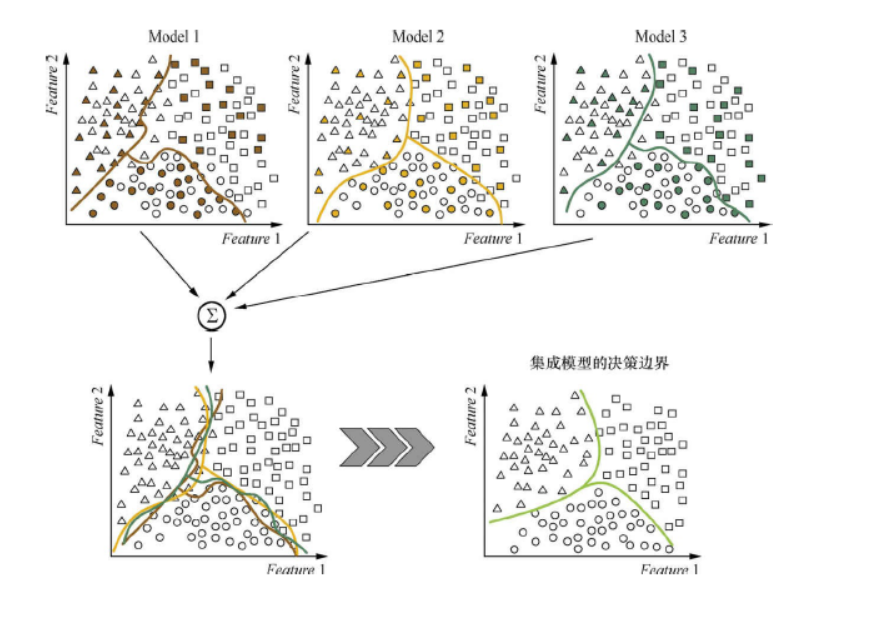



上图是Bagging算法的示意图，Model 1、Model 2、Model 3都是用训练集的一个子集训练出来的，单独来看，它们的决策边界都很曲折，有过拟合的倾向。集成之后的模型（红线所示）的决策边界就比各个独立的模型平滑了，这是由于集成的加权投票方法，减小了方差。

## 4.3 集成学习的步骤

​		虽然集成学习的具体算法和策略各不相同，但都共享同样的基本步骤。

​		集成学习一般可分为以下3个步骤。
​		（1）找到误差互相独立的基分类器。
​		（2）训练基分类器。
​		（3）合并基分类器的结果。

​		合并基分类器的方法有voting和stacking两种。前者是用投票的方式，将获得最多选票的结果作为最终的结果。后者是用串行的方式，把前一个基分类器的结果输出到下一个分类器，将所有基分类器的输出结果相加（或者用更复杂的算法融合，比如把各基分类器的输出作为特征，使用逻辑回归作为融合模型进行最后的结果预测）作为最终的输出。

​		Boosting的思想，对分类正确的样本降低了权重，对分类错误的样本升高或者保持权重不变。在最后进行模型融合的过程中，也根据错误率对基分类器进行加权融合。错误率低的分类器拥有更大的“话语权”。
​		另一个非常流行的模型是梯度提升决策树，其核心思想是，每一棵树学的是之前所有树结论和的残差，这个残差就是一个加预测值后能得真实值的累加量。

​		以一个视频网站的用户画像为例，为了将广告定向投放给指定年龄的用户，视频网站需要对每个用户的年龄做出预测。在这个问题中，每个样本是一个已知性别/年龄的用户，而特征则包括这个人访问的时长、时段、观看的视频的类型等。
​		例如用户A的真实年龄是25岁，但第一棵决策树的预测年龄是22岁，差了3岁，即残差为3。那么在第二棵树里我们把A的年龄设为3岁去学习，如果第二棵树能把A分到3岁的叶子节点，那两棵树的结果相加就可以得到A的真实年龄；如果第二棵树的结论是5岁，则A仍然存在−2岁的残差，第三棵树里A的年龄就变成−2岁，继续学。这里使用残差继续学习，就是GBDT中Gradient Boosted所表达的意思。


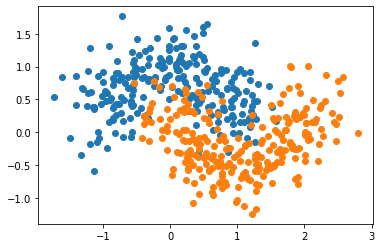

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.88

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

# ==========================>>
# 手动实现集成学习(这里单个模型未调优，可以自己调到最优，进行jicheng)
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
log_clf.score(X_test, y_test)

from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)


from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)


y_pre_log = log_clf.predict(X_test)
y_pre_svm = svm_clf.predict(X_test)
y_pre_dt = dt_clf.predict(X_test)

# 进行少数服从多数（投票）
# （>=2?）三个模型，当有2个或3个预测为1，就说其是1,否则就是0
y_pre = np.array((y_pre_log + y_pre_svm + y_pre_dt) >= 2, dtype='int')
y_pre

# 查看准确率
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pre)

# =============>>
# 使用voting进行集成

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()),
    ('svm_clf', SVC()),
    ('dt_clf', DecisionTreeClassifier())
], voting='hard')

voting_clf.fit(X_train, y_train)

voting_clf.score(X_test, y_test)

## 4.4 从减小方差和偏差的角度解释Boosting和Bagging

​		Bagging能够提高弱分类器性能的原因是降低了方差，Boosting能够提升弱分类器性能的原因是降低了偏差。首先，Bagging 是 Bootstrap Aggregating 的简称，意思就是再抽样，然后在每个样本上训练出来的模型取平均。

​		假设有n个随机变量，方差记为 $σ^2$，两两变量之间的相关性为$ρ$，则n个随机变量的均值的方差为。在随机变量完全独立的情况下，n个随机变量的方差为$σ^2/n$，也就是说方差减小到了原来的1/n。再从模型的角度理解这个问题，对n个独立不相关的模型的预测结果取平均，方差是原来单个模型的1/n。这个描述不甚严谨，但原理已经讲得很清楚了。当然，模型之间不可能完全独立。为了追求模型的独立性，诸多Bagging的方法做了不同的改进。比如在随机森林算法中，每次选取节点分裂属性时，会随机抽取一个属性子集，而不是从所有属性中选取最优属性，这就是为了避免弱分类器之间过强的相关性。通过训练集的重采样也能够带来弱分类器之间的一定独立性，从
而降低Bagging后模型的方差。再看Boosting，大家应该还记得Boosting的训练过程。在训练好一个弱分类器后，我们需要计算弱分类器的错误或者残差，作为下一个分类器的输入。这个过程本身就是在不断减小损失函数，来使模型不断逼近“靶心”，使得模型偏差不断降低。但Boosting的过程并不会显著降低方差。这是因为Boosting的训练过程使得各弱分类器之间是强相关的，缺乏独立性，所以并不会对降低方差有作用。关于泛化误差、偏差、方差和模型复杂度的关系如下图所示。不难看出，方差和偏差是相辅相成，矛盾又统一的，二者并不能完全独立的存在。对于给定的学习任务和训练数据集，我们需要对模型的复杂度做合理的假设。如果模型复杂度过低，虽然方差很小，但是偏差会很高；如果模型复杂度过高，虽然偏差降低了，但是方差会很高。所以需要综合考虑偏差和方差选择合适复杂度的模型进行训练。

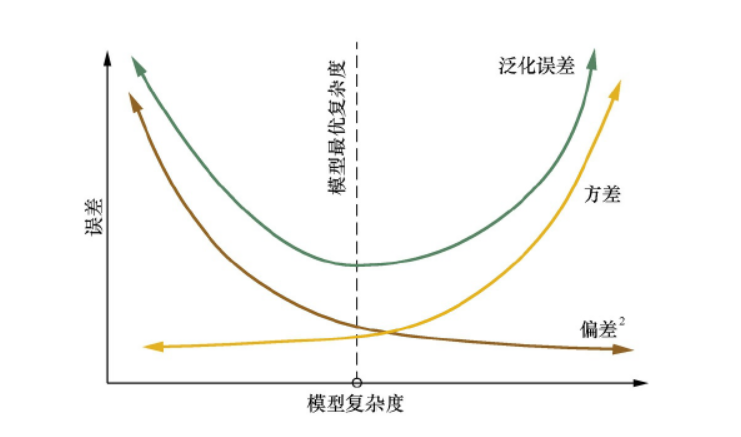
​														*泛化误差、偏差、方差和模型复杂度的关系*



# 参考资料：

以上只是介绍了部分机器学习模型调优方法，还有很多方法希望学习者多多参考学习:

- [模型评估与调优](https://machine-learning-from-scratch.readthedocs.io/zh_CN/latest/%E6%A8%A1%E5%9E%8B%E8%AF%84%E4%BC%B0%E4%B8%8E%E6%A8%A1%E5%9E%8B%E8%B0%83%E4%BC%98.html)

- [深度学习模型调优方法](https://www.cnblogs.com/chenzhenhong/p/13437132.html)

- [模型调优技巧](http://lucky521.github.io/blog/machinelearning/2018/10/17/modeling-tuning.html)

- [模型调优与融合](https://zhuanlan.zhihu.com/p/38171570)

- [【机器学习】交叉验证详解](https://zhuanlan.zhihu.com/p/24825503?refer=rdatamining)

- [交叉验证](https://www.zhihu.com/question/39259296)

